# Single cell response to step versus ramp input
### 1. Overview
Whether single *Dictyostelium* cells display an intracellular cAMP spike depends on the rate at which the input is applied (below). In this notebook we are going to explore different models's ability to reproduce this behavior. With this notebook, you can play with different $cAMP_{e}$ inputs as well as the rate at which the input is applied, and compare the simulated responses ($cAMP_{i}$) produced by different models. The default ramp input is matched with the shape of the input used in experiments.
![Figure](imgs/single_cell_step_ramp.png)
<h5><center>Single cell response to step versus ramp inputs.</center></h5>

#### Let's start by importing packages and setting up time scaling parameters

In [1]:
import os
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import scipy.io

os.chdir("../compare_models")
from Gregor2010_agent_and_pop_FUN import  Gregor2010_agent
from Sgro2015_agent_and_pop_FUN import Sgro2015_agent
from Goldbeter1987_agent_and_pop_FUN import Goldbeter1987_agent_3var
from MaedaLoomis2004_agent_and_pop_FUN import MaedaLoomis2004_agent
from Kamino2017_agent_and_pop_FUN import Kamino2017_agent 
from NB_SC_functions import plot_SC_step_ramp
# Normalization parameters
from Params import NormParams
for key,val in NormParams.items():
        exec(key + '=val')
os.chdir("../Notebooks") 

### 2. Experimental data 
#### import and plot experimental data

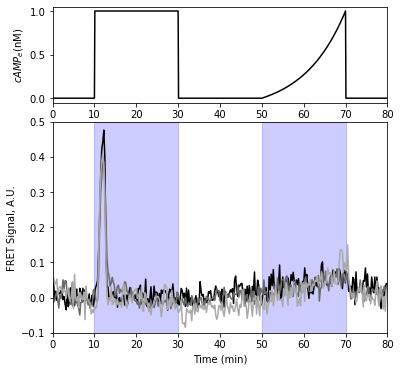

In [2]:
Sgro2015Figure3excel = pd.read_excel(r'../exp_data/Sgro2015DataFormattedforPython.xlsx',sheet_name='Figure3')

fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(3, 1)
ax0 = fig.add_subplot(grid[0, 0])
ax0.plot(Sgro2015Figure3excel["Ramp Input (min Time)"],Sgro2015Figure3excel["Ramp Input (nM cAMP)"],color='k')
ax0.set_ylabel(r'$cAMP_{e}$(nM)')
ax0.set_xlabel('Time, A.U.')
ax0.set_xlim([0,80])

ax1= fig.add_subplot(grid[1:, 0])
ax1.plot(Sgro2015Figure3excel["Cell Trace Time (min)"],Sgro2015Figure3excel["Cell 1 FRET Trace"],color='k')
ax1.plot(Sgro2015Figure3excel["Cell Trace Time (min)"],Sgro2015Figure3excel["Cell 2 FRET Trace"],color='dimgrey')
ax1.plot(Sgro2015Figure3excel["Cell Trace Time (min)"],Sgro2015Figure3excel["Cell 3 FRET Trace"],color='darkgrey')
ax1.axvspan(10, 30, alpha=0.2, color='b'); ax1.axvspan(50, 70, alpha=0.2, color='b')
ax1.set_ylabel('FRET Signal, A.U.')
ax1.set_xlabel('Time (min)')
ax1.tick_params(axis='both', which='major')
ax1.set_ylim([-0.1,0.5]); ax1.set_xlim([0,80])
plt.show()

### 3. Receptor desensitization
#### Set up parameters (from Table II in [Matiel & Goldbeter 1987](https://www.sciencedirect.com/science

In [3]:
from NB_SC_functions import  Goldbeter1986_SC
from Params import Goldbeter3AgentParam

#### Define input trace

In [4]:
cAMP=1
T_tot = 16; T_tot = T_tot*Nt_Goldbeter
dt=0.001; t=list(np.arange(0,T_tot,dt))
# trace from 
Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]# np.linspace(0,20,num=1000) # t step 0.02
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Goldbeter
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = RampInput_Exp[~np.isnan(RampInput_Exp)]

Goldbeter_time = np.arange(0,16*Nt_Goldbeter,dt)
RampInput_Goldbeter= cAMP*np.interp(Goldbeter_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

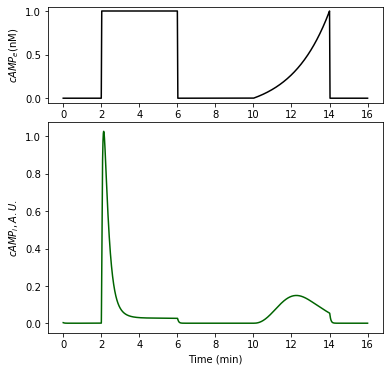

In [5]:
[t_plot_Goldbeter, b_trace, p_trace] = Goldbeter1986_SC(Goldbeter3AgentParam,dt,t,RampInput_Goldbeter)
t_plot_Goldbeter = t_plot_Goldbeter/(Nt_Goldbeter)

# Normalize height of cAMPi response trace to 1
b_trace = b_trace/Nh_Goldbeter

plot_SC_step_ramp(t_plot_Goldbeter, RampInput_Goldbeter, b_trace)


### 4. CDINFB
#### Parameters (from supplementary in [Maeda et al. 2004](https://science.sciencemag.org/content/304/5672/875/tab-figures-data) )

In [6]:
from NB_SC_functions import Maeda2004_SC
from Params import MaedaAgentParam

#### Define step input trace

In [7]:
cAMP=1
T_tot = 16 * Nt_Maeda
dt=0.001; t=list(np.arange(0,T_tot,dt))

Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]# np.linspace(0,20,num=1000) # t step 0.02
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Maeda
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = cAMP*RampInput_Exp[~np.isnan(RampInput_Exp)]

Maeda_time = np.arange(0,16*Nt_Maeda,dt)
RampInput_Maeda= np.interp(Maeda_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

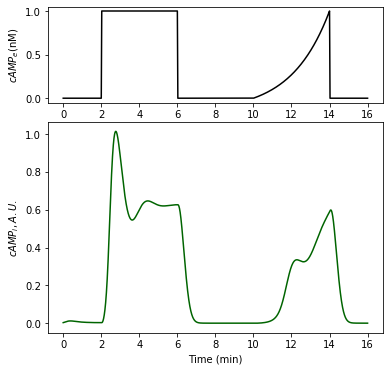

In [8]:
[t_plot_Maeda, cAMPi_trace, ERK2_trace] = Maeda2004_SC(MaedaAgentParam,dt,t,RampInput_Maeda)
t_plot_Maeda = np.array(t)/(Nt_Maeda)

# Normalize height of cAMPi response trace to 1
cAMPi_trace = cAMPi_trace/Nh_Maeda
plot_SC_step_ramp(t_plot_Maeda, RampInput_Maeda, cAMPi_trace)

### 5. IPNFB
#### Parameters

In [16]:
from Params import SgroAgentParam
SgroAgentParam['sigma'] = 0.1
from NB_SC_functions import Sgro2015_SC

#### Define step input trace

In [17]:
cAMP=1
T_tot = 16; T_tot=T_tot*Nt_Sgro
dt=0.001 ;  t=list(np.arange(0,T_tot,dt))
Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Sgro
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = RampInput_Exp[~np.isnan(RampInput_Exp)]

Sgro_time = np.arange(0,16*Nt_Sgro,dt)
RampInput_Sgro= cAMP*np.interp(Sgro_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

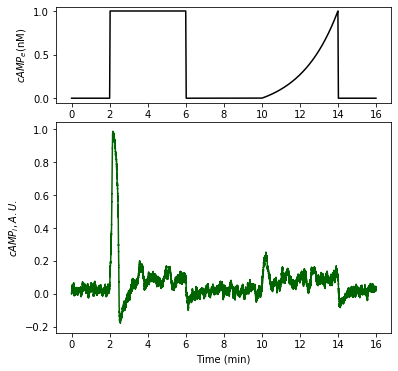

In [19]:
[t_plot_Sgro, A_trace_plot,R_trace_orig] = Sgro2015_SC(SgroAgentParam,dt,t,RampInput_Sgro)
t_plot_Sgro = t_plot_Sgro/(Nt_Sgro)

# Normalize height of cAMPi response trace to 1
A_trace_plot = (A_trace_plot - Nh_Sgro_offset)/Nh_Sgro
plot_SC_step_ramp(t_plot_Sgro, RampInput_Sgro, A_trace_plot)


### 7. IFFL
#### Set up parameters

In [20]:
from Params import KaminoAgentParam
from NB_SC_functions import Kamino2017_SC

#### Define step input trace

In [21]:
cAMP=1
T_tot = 16 * Nt_Kamino
dt=0.001; t=list(np.arange(0,T_tot,dt))

Exp_time = Sgro2015Figure3excel["Ramp Input (min Time)"]# np.linspace(0,20,num=1000) # t step 0.02
Exp_time = Exp_time[~np.isnan(Exp_time)]/5*Nt_Kamino
RampInput_Exp = Sgro2015Figure3excel["Ramp Input (nM cAMP)"]
RampInput_Exp = RampInput_Exp[~np.isnan(RampInput_Exp)]

Kamino_time = np.arange(0,16*Nt_Kamino,dt)
RampInput_Kamino= cAMP*np.interp(Kamino_time, Exp_time,RampInput_Exp)

#### Get $cAMP_i$ simulation response

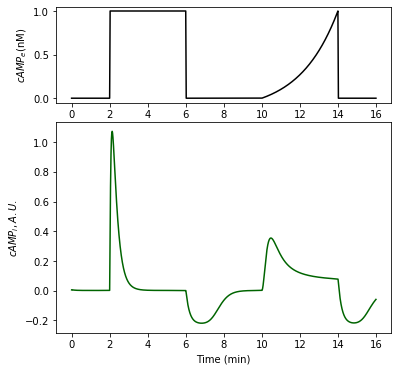

In [22]:
[t_plot_Kamino, y_trace, x_trace] = Kamino2017_SC(KaminoAgentParam,dt,t,RampInput_Kamino)
t_plot_Kamino = t_plot_Kamino/Nt_Kamino

# Normalize height of cAMPi response trace to 1
y_trace = (y_trace-Nh_Kamino_offset)/Nh_Kamino
plot_SC_step_ramp(t_plot_Kamino, RampInput_Kamino, y_trace)
